In [2]:
#import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
#from config import weather_api_key
import time
from datetime import datetime

In [9]:
#import keys by other way
import sys 
sys.path.append("C:/Users/Ameysne/api")
from api_key import weather_api_key
api_key = weather_api_key


In [10]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000,high=90.000,size=1500)

lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [13]:
import requests
requests.__version__

'2.26.0'

    For each city in our lats_lngs list, we need to retrieve the following data and add it to a DataFrame:

    City, country, and date
    Latitude and longitude
    Maximum temperature
    Humidity
    Cloudiness
    Wind speed
    Our final DataFrame should look like the following.

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#for i in range (len(cities)):
#    if (i % 50 and i>=50):
#        set_count +=1
#        record_count +=1
#        time.sleep(60)
#        #create endpoint url by city
#        city_url=url + "+q=" + cities[i]
        #print(city_url)
    
# Loop through all the cities in the list.    
for i, city  in enumerate (cities):
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count +=1
        record_count +=1
        time.sleep(60) 
        # Create endpoint URL with each city.
    city_url = url + "&q=" +city.replace(" ", " +")
        # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
    record_count += 1
        # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuala terengganu
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | muros
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | billings
Processing Record 7 of Set 1 | vilhena
Processing Record 8 of Set 1 | coihaique
Processing Record 9 of Set 1 | skjervoy
Processing Record 10 of Set 1 | takoradi
Processing Record 11 of Set 1 | kloulklubed
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | kharp
Processing Record 15 of Set 1 | asyut
Processing Record 16 of Set 1 | sao joao da barra
City not found. Skipping...
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | rapid valley
City not found. Skipping...
Processing Record 20 of Set 1 | puerto ayora
City not found. Skip

Processing Record 169 of Set 4 | amderma
City not found. Skipping...
Processing Record 170 of Set 4 | qandala
Processing Record 171 of Set 4 | kautokeino
Processing Record 172 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 173 of Set 4 | ler
Processing Record 174 of Set 4 | tarauaca
Processing Record 175 of Set 4 | nagram
Processing Record 176 of Set 4 | ossora
Processing Record 177 of Set 4 | mae sai
City not found. Skipping...
Processing Record 178 of Set 4 | oistins
Processing Record 179 of Set 4 | kannur
Processing Record 180 of Set 4 | prieska
Processing Record 181 of Set 4 | safaga
Processing Record 182 of Set 4 | ilo
Processing Record 183 of Set 4 | sakaiminato
Processing Record 184 of Set 4 | kocser
Processing Record 185 of Set 4 | tuatapere
Processing Record 186 of Set 4 | thayetmyo
Processing Record 187 of Set 4 | lata
Processing Record 188 of Set 4 | ranong
Processing Record 189 of Set 4 | sobolevo
Processing Record 190 of Set 4 | la ronge
City not found. 

Processing Record 340 of Set 7 | gizo
Processing Record 341 of Set 7 | kalemie
Processing Record 342 of Set 7 | cartagena
Processing Record 343 of Set 7 | rawson
Processing Record 344 of Set 7 | placido de castro
City not found. Skipping...
Processing Record 345 of Set 7 | talnakh
Processing Record 346 of Set 7 | saint-augustin
Processing Record 347 of Set 7 | morant bay
City not found. Skipping...
Processing Record 348 of Set 7 | comodoro rivadavia
City not found. Skipping...
Processing Record 349 of Set 7 | san luis
City not found. Skipping...
Processing Record 350 of Set 7 | ituni
City not found. Skipping...
Processing Record 351 of Set 7 | kamaishi
Processing Record 352 of Set 7 | sasaima
Processing Record 353 of Set 7 | honningsvag
Processing Record 354 of Set 7 | reconquista
Processing Record 355 of Set 7 | urumqi
Processing Record 356 of Set 7 | mount gambier
City not found. Skipping...
Processing Record 358 of Set 8 | hope
Processing Record 359 of Set 8 | singaparna
Processing 

Processing Record 511 of Set 11 | ambovombe
Processing Record 512 of Set 11 | beringovskiy
Processing Record 513 of Set 11 | mehamn
Processing Record 514 of Set 11 | yar-sale
Processing Record 515 of Set 11 | suez
Processing Record 516 of Set 11 | hami
Processing Record 517 of Set 11 | longyearbyen
Processing Record 518 of Set 11 | chuy
Processing Record 519 of Set 11 | quiindy
Processing Record 520 of Set 11 | riberalta
Processing Record 521 of Set 11 | talcahuano
Processing Record 522 of Set 11 | necochea
Processing Record 523 of Set 11 | zinder
Processing Record 524 of Set 11 | wanning
Processing Record 525 of Set 11 | dieppe
Processing Record 526 of Set 11 | glenwood springs
City not found. Skipping...
Processing Record 527 of Set 11 | makushino
Processing Record 528 of Set 11 | port macquarie
City not found. Skipping...
Processing Record 529 of Set 11 | tabou
Processing Record 530 of Set 11 | grand centre
City not found. Skipping...
Processing Record 531 of Set 11 | altar
Processi

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,58.62,62,40,35.68,AR,2021-12-21 17:14:29
1,Saint-Philippe,-21.3585,55.7679,78.39,87,74,12.01,RE,2021-12-21 17:16:38
2,Muros,42.7762,-9.0603,64.09,79,100,11.07,ES,2021-12-21 17:16:38
3,Leningradskiy,69.3833,178.4167,0.46,70,84,30.87,RU,2021-12-21 17:16:38
4,Billings,45.7833,-108.5007,36.52,72,20,3.44,US,2021-12-21 17:15:18
5,Vilhena,-12.7406,-60.1458,79.02,83,40,5.75,BR,2021-12-21 17:16:39
6,Coihaique,-45.5752,-72.0662,73.35,35,0,3.44,CL,2021-12-21 17:16:39
7,Skjervoy,70.0311,20.9714,26.78,55,100,10.67,NO,2021-12-21 17:16:39
8,Takoradi,4.8845,-1.7554,83.77,53,68,9.95,GH,2021-12-21 17:16:40
9,Kloulklubed,7.0419,134.2556,77.50,79,100,19.44,PW,2021-12-21 17:16:40


In [36]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-12-21 17:14:29,-54.8000,-68.3000,58.62,62,40,35.68
1,Saint-Philippe,RE,2021-12-21 17:16:38,-21.3585,55.7679,78.39,87,74,12.01
2,Muros,ES,2021-12-21 17:16:38,42.7762,-9.0603,64.09,79,100,11.07
3,Leningradskiy,RU,2021-12-21 17:16:38,69.3833,178.4167,0.46,70,84,30.87
4,Billings,US,2021-12-21 17:15:18,45.7833,-108.5007,36.52,72,20,3.44
5,Vilhena,BR,2021-12-21 17:16:39,-12.7406,-60.1458,79.02,83,40,5.75
6,Coihaique,CL,2021-12-21 17:16:39,-45.5752,-72.0662,73.35,35,0,3.44
7,Skjervoy,NO,2021-12-21 17:16:39,70.0311,20.9714,26.78,55,100,10.67
8,Takoradi,GH,2021-12-21 17:16:40,4.8845,-1.7554,83.77,53,68,9.95
9,Kloulklubed,PW,2021-12-21 17:16:40,7.0419,134.2556,77.50,79,100,19.44


In [132]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [133]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


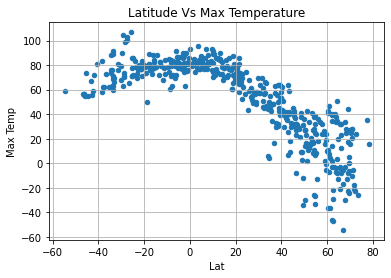

In [134]:
city_data_df.plot(x = 'Lat',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = True)

# save the figure 
plt.savefig("output.png")

# Display the plot 
plt.show()

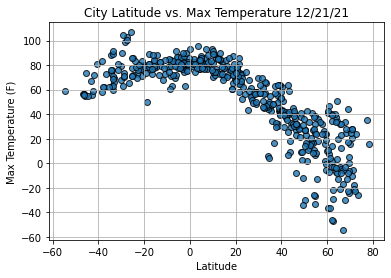

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
#plt.ylim(40,110)
#plt.xlim(-60,80)
#plt.xticks(np.arange(-60,100,20))
#plt.yticks(np.arange(40,110,10))
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

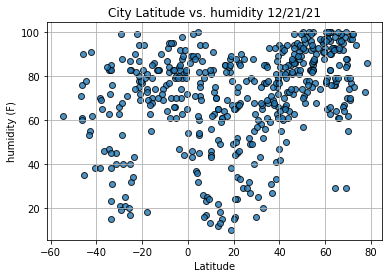

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. humidity "+ time.strftime("%x"))
plt.ylabel("humidity (F)")
plt.xlabel("Latitude")
#plt.ylim(40,110)
#plt.xlim(-60,80)
#plt.xticks(np.arange(-60,100,20))
#plt.yticks(np.arange(40,110,10))
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

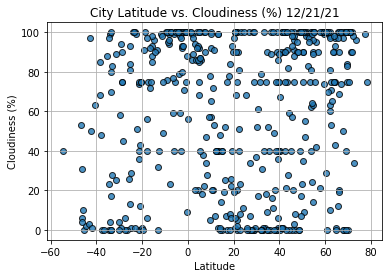

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

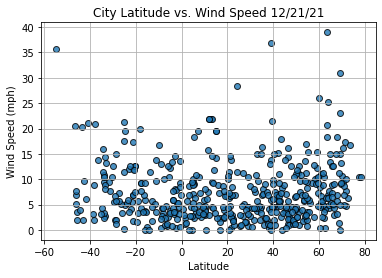

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
import scipy
requests.__version__


'2.26.0'

In [49]:
# Import linregress

from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]
index13

City                        Asyut
Country                        EG
Date          2021-12-21 17:16:41
Lat                        27.181
Lng                       31.1837
Max Temp                    54.73
Humidity                       49
Cloudiness                      7
Wind Speed                   5.12
Name: 13, dtype: object

In [55]:
city_data=city_data_df["Lat"] >= 0
city_data.head(10)


0    False
1    False
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
Name: Lat, dtype: bool

In [58]:
city_data= city_data_df.loc[city_data_df["Lat"] >= 0]
city_data.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Muros,ES,2021-12-21 17:16:38,42.7762,-9.0603,64.09,79,100,11.07
3,Leningradskiy,RU,2021-12-21 17:16:38,69.3833,178.4167,0.46,70,84,30.87
4,Billings,US,2021-12-21 17:15:18,45.7833,-108.5007,36.52,72,20,3.44
7,Skjervoy,NO,2021-12-21 17:16:39,70.0311,20.9714,26.78,55,100,10.67
8,Takoradi,GH,2021-12-21 17:16:40,4.8845,-1.7554,83.77,53,68,9.95
9,Kloulklubed,PW,2021-12-21 17:16:40,7.0419,134.2556,77.50,79,100,19.44
11,Salalah,OM,2021-12-21 17:16:41,17.0151,54.0924,77.09,69,0,2.30
12,Kharp,RU,2021-12-21 17:16:41,66.8014,65.8081,-17.00,99,100,2.86
13,Asyut,EG,2021-12-21 17:16:41,27.1810,31.1837,54.73,49,7,5.12
16,Faya,SA,2021-12-21 17:16:43,18.3851,42.4509,60.91,82,84,2.37


In [59]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Muros,ES,2021-12-21 17:16:38,42.7762,-9.0603,64.09,79,100,11.07
3,Leningradskiy,RU,2021-12-21 17:16:38,69.3833,178.4167,0.46,70,84,30.87
4,Billings,US,2021-12-21 17:15:18,45.7833,-108.5007,36.52,72,20,3.44
7,Skjervoy,NO,2021-12-21 17:16:39,70.0311,20.9714,26.78,55,100,10.67
8,Takoradi,GH,2021-12-21 17:16:40,4.8845,-1.7554,83.77,53,68,9.95


In [135]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
#northern_hemi_df

In [136]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
#southern_hemi_df

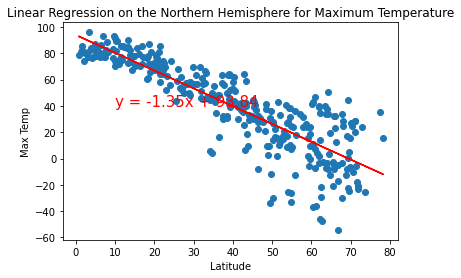

In [107]:
#Perform Linear Regression on the Max Temp for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
#Linear Regression on Northern hemishere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,40))

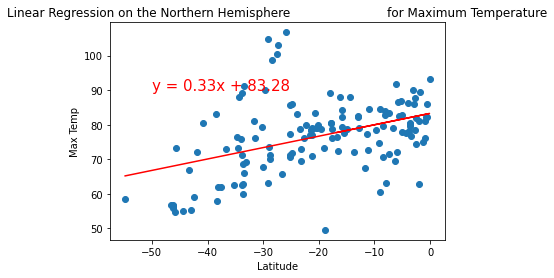

In [101]:
#Perform Linear Regression on the Max Temp for the Southern Hemisphere
#Linear Regression on Southern hemishere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [80]:
# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.77x + 68.15
The p-value is: 0.000


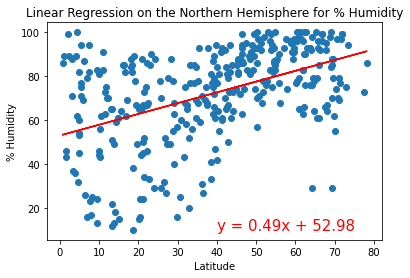

In [110]:
#Perform Linear Regression on the Humidity for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,10))
                       
                         

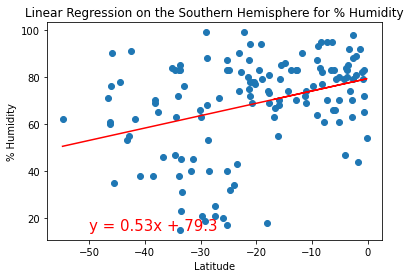

In [111]:
#Perform Linear Regression on the Humidity for the Southern Hemisphere
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity',
                       
                         '% Humidity',(-50,15))

In [117]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.2x + 66.68
The p-value is: 0.000


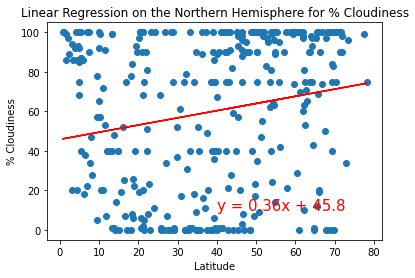

In [115]:
# Skill Drill Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',(40,10))
                       

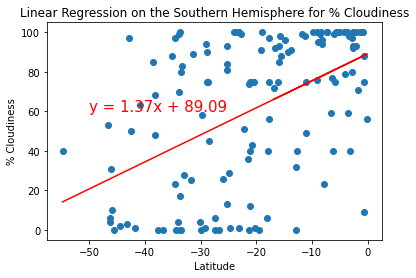

In [116]:
# Skill Drill Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       
                         '% Cloudiness',(-50,60))

In [118]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.15x + 57.04
The p-value is: 0.004


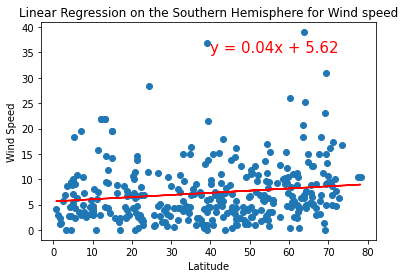

In [120]:
#Perform Linear Regression on the Wind Speed for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind speed'
                       , 'Wind Speed',(40,35))

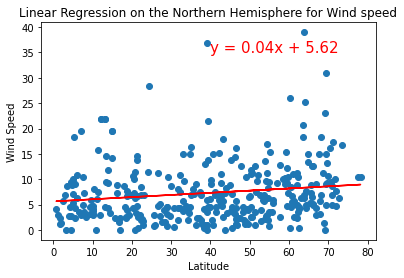

In [127]:
#Perform Linear Regression on the Wind Speed for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind speed'
                       , 'Wind Speed',(40,35))


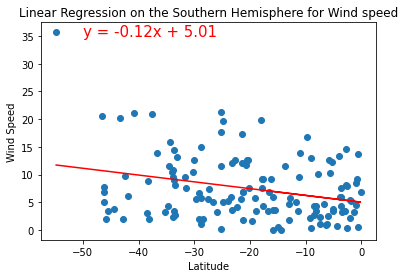

In [128]:
#Perform Linear Regression on the Wind Speed for the Southern Hemisphere
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind speed',
                       'Wind Speed',(-50,35))

In [129]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.0x + 7.26
The p-value is: 0.645
